# Visualization of LSTM Model Results

## Intro to Model Information

In [1]:
import pandas as pd


"""
benchmark = no user behavior + mro_prev + purchase time + complex agg
benchmark old agg = no user behavior + mro_prev + purchase time + simple agg
our model = user behavior + mro_prev + purchase time + complex agg
our model old agg = user behavior + mro_prev + purchase time + simple agg
our model attention = user behavior + mro_prev + purchase time + complex agg + attention
our model no prev mro = user behavior + purchase time + complex agg
our model no purchase time = user behavior + mro_prev + complex agg
"""


model_info = pd.DataFrame(
    [
        {
            "Model Name": "Benchmark",
            "User Behavior": False,
            "MRO Prev": True,
            "Purchase Time": True,
            "Aggregation": "Complex",
            "Attention": False,
        },
        {
            "Model Name": "Benchmark Old Agg",
            "User Behavior": False,
            "MRO Prev": True,
            "Purchase Time": True,
            "Aggregation": "Simple",
            "Attention": False,
        },
        {
            "Model Name": "Our Model",
            "User Behavior": True,
            "MRO Prev": True,
            "Purchase Time": True,
            "Aggregation": "Complex",
            "Attention": False,
        },
        {
            "Model Name": "Our Model Old Agg",
            "User Behavior": True,
            "MRO Prev": True,
            "Purchase Time": True,
            "Aggregation": "Simple",
            "Attention": False,
        },
        {
            "Model Name": "Our Model + Attention",
            "User Behavior": True,
            "MRO Prev": True,
            "Purchase Time": True,
            "Aggregation": "Complex",
            "Attention": True,
        },
        {
            "Model Name": "Our Model No Prev MRO",
            "User Behavior": True,
            "MRO Prev": False,
            "Purchase Time": True,
            "Aggregation": "Complex",
            "Attention": False,
        },
        {
            "Model Name": "Our Model No Purchase Time",
            "User Behavior": True,
            "MRO Prev": True,
            "Purchase Time": False,
            "Aggregation": "Complex",
            "Attention": False,
        },
    ]
)


model_info

,Model Name,User Behavior,MRO Prev,Purchase Time,Aggregation,Attention
0,Benchmark,False,True,True,Complex,False
1,Benchmark Old Agg,False,True,True,Simple,False
2,Our Model,True,True,True,Complex,False
3,Our Model Old Agg,True,True,True,Simple,False
4,Our Model + Attention,True,True,True,Complex,True
5,Our Model No Prev MRO,True,False,True,Complex,False
6,Our Model No Purchase Time,True,True,False,Complex,False


In [2]:
latex_table = model_info.to_latex(index=False)
print(latex_table)

\begin{tabular}{lrrrlr}
\toprule
Model Name & User Behavior & MRO Prev & Purchase Time & Aggregation & Attention \\
\midrule
Benchmark & False & True & True & Complex & False \\
Benchmark Old Agg & False & True & True & Simple & False \\
Our Model & True & True & True & Complex & False \\
Our Model Old Agg & True & True & True & Simple & False \\
Our Model + Attention & True & True & True & Complex & True \\
Our Model No Prev MRO & True & False & True & Complex & False \\
Our Model No Purchase Time & True & True & False & Complex & False \\
\bottomrule
\end{tabular}



## Training Log Visualization

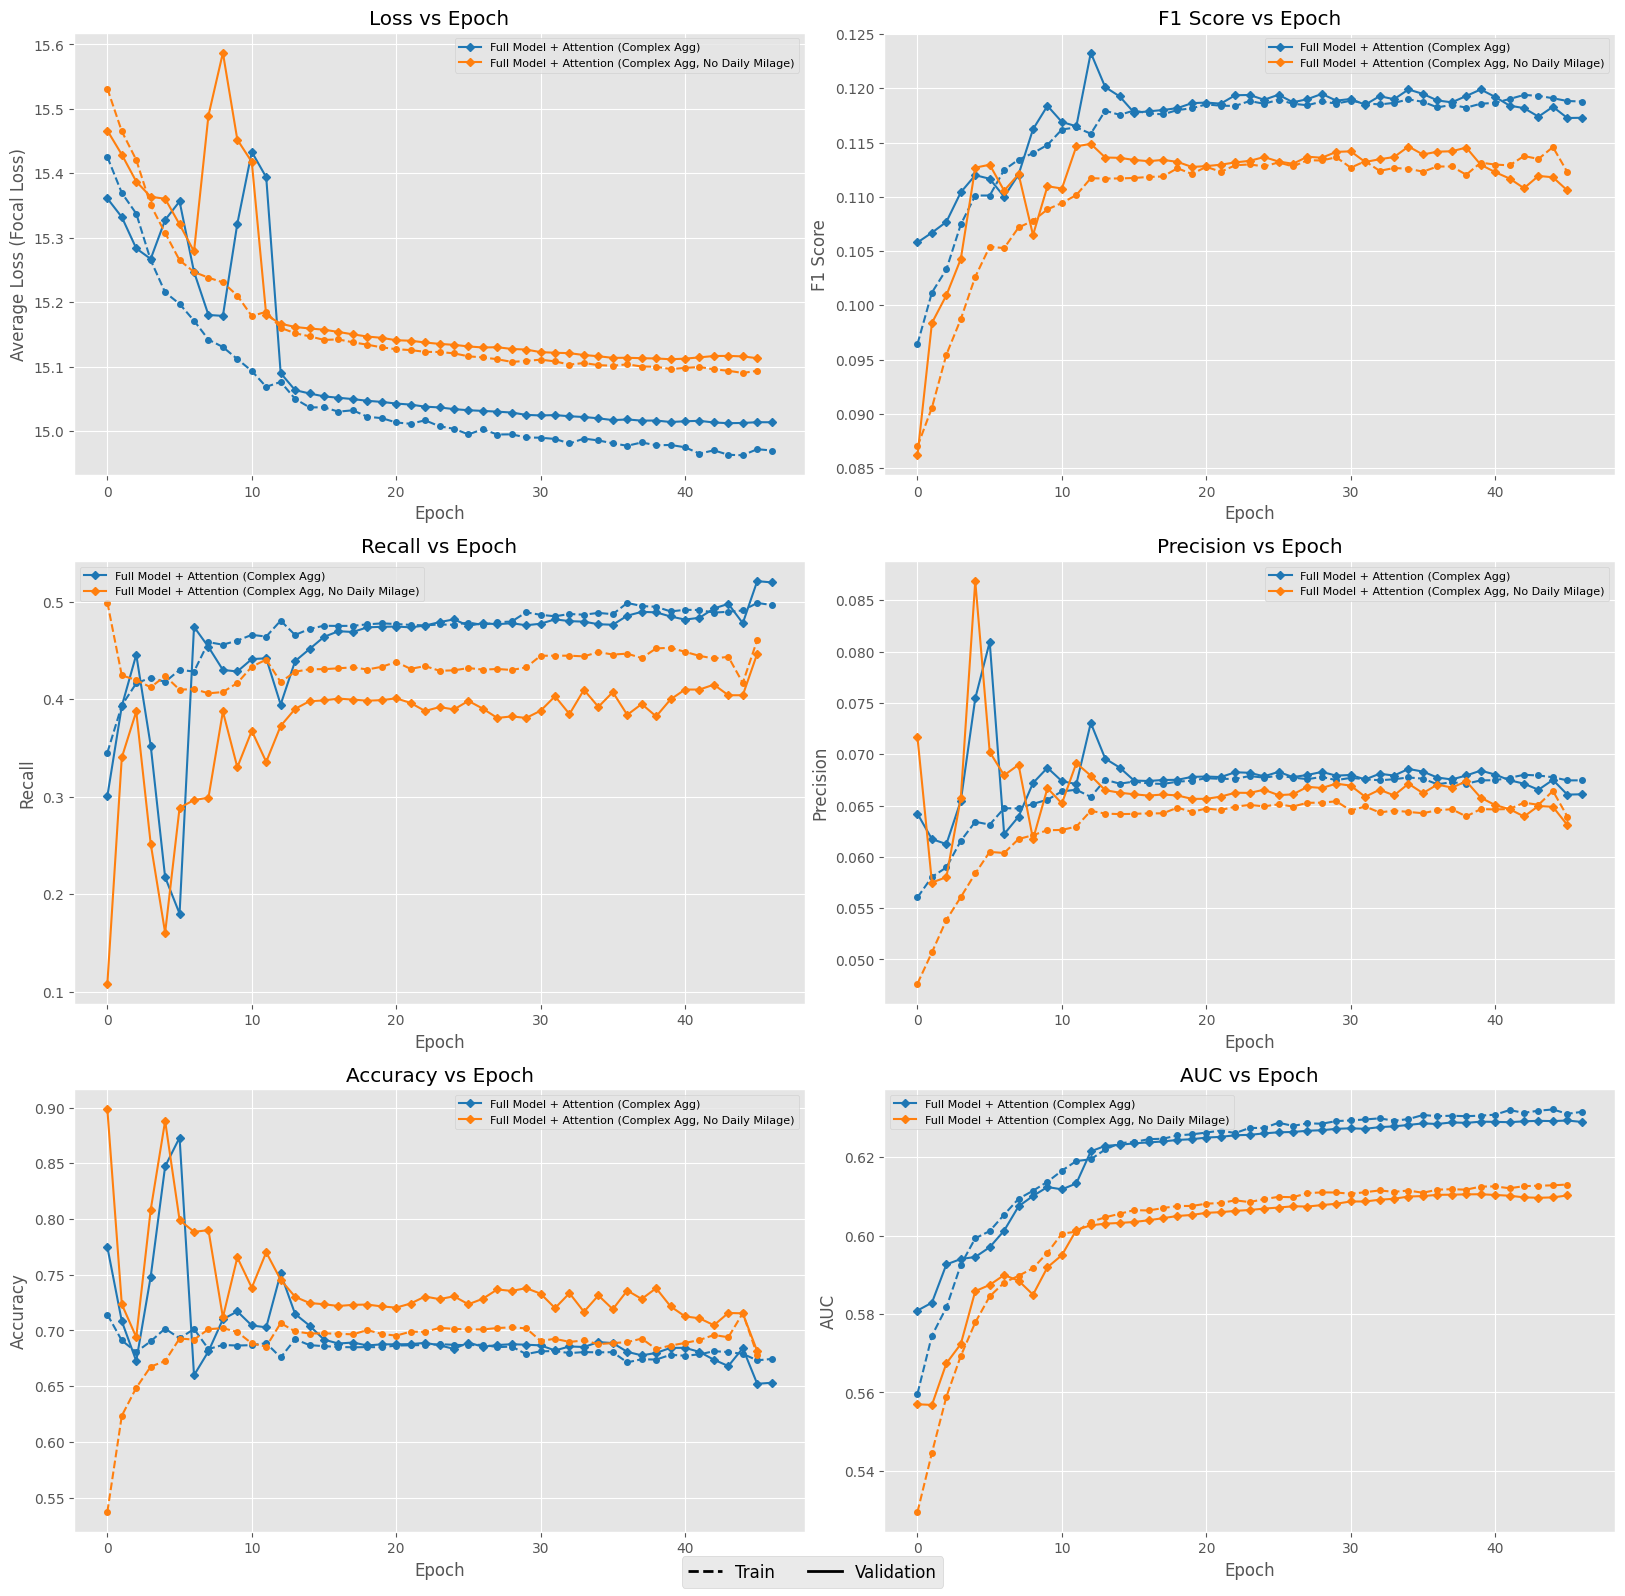

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define model paths and names


# model_paths = {
#     "Benchmark": "./output/lstm/benchmark/ray_train_log.csv",
#     "Benchmark Old Agg": "./output/lstm/benchmark_old_agg/ray_train_log.csv",
#     "Our Model": "./output/lstm/our_model/ray_train_log.csv",
#     "Our Model Old Agg": "./output/lstm/our_model_old_agg/ray_train_log.csv",
#     "Our Model + Attention": "./output/lstm/our_model_transformer/ray_train_log.csv",
#     "Our Model No Prev MRO": "./output/lstm/our_model_without_prev_mro/ray_train_log.csv",
#     "Our Model No Purchase Time": "./output/lstm/our_model_without_purchase_time/ray_train_log.csv",
# }

model_paths = {
    # "Baseline (Complex Agg)": "./output/lstm/benchmark/ray_train_log.csv",
    # "Baseline (Simple Agg)": "./output/lstm/benchmark_old_agg/ray_train_log.csv",
    # "Full Model (Complex Agg)": "./output/lstm/our_model/ray_train_log.csv",
    # "Full Model (Simple Agg)": "./output/lstm/our_model_old_agg/ray_train_log.csv",
    "Full Model + Attention (Complex Agg)": "./output/lstm/our_model_transformer/ray_train_log.csv",
    "Full Model + Attention (Complex Agg, No Daily Milage)": "./output/lstm/our_model_transformer_nomil/ray_train_log.csv",
    # "Full Model - Prev MRO (Complex Agg)": "./output/lstm/our_model_without_prev_mro/ray_train_log.csv",
    # "Full Model - Purchase Time (Complex Agg)": "./output/lstm/our_model_without_purchase_time/ray_train_log.csv",
}

# Load data for all models
model_data = {}
for name, path in model_paths.items():
    model_data[name] = pd.read_csv(path)

plt.style.use("ggplot")
# Set up the figure layout: 3 rows, 2 columns (6 subplots total)
# fig, axes = plt.subplots(3, 2, figsize=(27, 24))
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Custom color list (corresponding to each model)
# colors = ["#2E86C1", "#28B463", "#E67E22", "#9B59B6", "#F1C40F", "#E74C3C", "#1ABC9C"]
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#17becf",
]
# markers = ["o", "s", "^", "v", "D"]
# markers = ["o", "o", "o", "o", "o", "o", "o"]
linestyles = ["-", "--"]


def plot_metric(
    ax,
    metric_name,
    title,
    ylabel,
    add_train: bool,
    add_valid: bool,
):

    for idx, (model_name, data) in enumerate(model_data.items()):
        if add_train:
            ax.plot(
                data["epoch"],
                data[f"train_{metric_name}"],
                color=colors[idx],
                # marker=markers[idx],
                marker="o",
                linestyle="--",
                label=model_name,
                markersize=4,
            )
        if add_valid:
            ax.plot(
                data["epoch"],
                data[f"val_{metric_name}"],
                color=colors[idx],
                # marker=markers[idx],
                marker="D",
                linestyle="-",
                label=model_name,
                markersize=4,
            )

    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(ylabel)
    ax.grid(True)

    # Add a legend to each subplot, showing each model only once
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    ax.legend(by_label.values(), by_label.keys(), fontsize=8)


add_train = True
add_valid = True
# add_valid = False
# Plot each metric

plot_metric(
    axes[0, 0],
    "average_loss",
    "Loss vs Epoch",
    "Average Loss (Focal Loss)",
    add_train,
    add_valid,
)
plot_metric(
    axes[0, 1],
    "f1",
    "F1 Score vs Epoch",
    "F1 Score",
    add_train,
    add_valid,
)
plot_metric(
    axes[1, 0],
    "recall",
    "Recall vs Epoch",
    "Recall",
    add_train,
    add_valid,
)
plot_metric(
    axes[1, 1],
    "precision",
    "Precision vs Epoch",
    "Precision",
    add_train,
    add_valid,
)
plot_metric(
    axes[2, 0],
    "accuracy",
    "Accuracy vs Epoch",
    "Accuracy",
    add_train,
    add_valid,
)
plot_metric(
    axes[2, 1],
    "auc",
    "AUC vs Epoch",
    "AUC",
    add_train,
    add_valid,
)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Leave space for the legend

# Create custom legend for train/val (dashed/solid lines)
# legend_elements = [
#     Line2D([0], [0], color="black", lw=2, ls="--", label="Train"),
#     Line2D([0], [0], color="black", lw=2, ls="-", label="Validation"),
# ]
legend_elements = []
if add_train:
    legend_elements.append(
        Line2D([0], [0], color="black", lw=2, ls="--", label="Train")
    )
if add_valid:
    legend_elements.append(
        Line2D([0], [0], color="black", lw=2, ls="-", label="Validation")
    )

# Add the legend to the bottom of the figure
fig.legend(handles=legend_elements, loc="lower center", ncol=2, fontsize=12)

plt.show()

---

# Inference on Test Set

In [ ]:
from model import preprocess_data
from model import mroRnnDataset
from utils import create_train_test_group

from torch.utils.data import DataLoader
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
)

from model import FocalLoss
from model import RnnModel
from utils import collate_fn

from collections import OrderedDict

import torch

# Check if CUDA (NVIDIA GPU) is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_gpus = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {num_gpus}")
    # Select a specific GPU (e.g., GPU 0)
    device = torch.device("cuda:6")  # Use "cuda:1" for GPU 1, etc.
    print(f"Using device: {torch.cuda.get_device_name(device)}")

import os
import pandas as pd
import numpy as np

In [ ]:
result_file = "./output/lstm/evaluation_results.csv"
# Check if file exists and remove it
if os.path.exists(result_file):
    os.remove(result_file)
    print(f"Deleted existing file: {result_file}")
else:
    print(f"No existing file found at: {result_file}")

## Define Model Evaluation

In [ ]:
def model_eval(
    device,
    experiment_name: str,
    csv_file_name: str,
    target_mro: list,
    maintain_repair_mro: str,
    add_mro_prev: bool,
    add_purchase_time: bool,
    add_driver_behavior: bool,
    agg_weeks: int,
    agg_fun: list,
    sample_frac: float,
    test_size: float,
    valid_size: float,
    seq_length: int,
    model_path: str,
    # control parameter: Focal Loss
    gamma: int,
    # control parameter:
    rnn_type: str,
    rnn_output_size: int,
    bidirectional: bool,
    num_layers: int,
    pooling_method: str,
    num_heads: int,
    batch_size: int,
    # save the results
    result_file="./output/lstm/evaluation_results.csv",
):
    prep_data = preprocess_data(
        file_name=csv_file_name,
        target_mro=target_mro,
        maintain_repair_mro=maintain_repair_mro,
        add_mro_prev=add_mro_prev,
        add_purchase_time=add_purchase_time,
        add_driver_behavior=add_driver_behavior,
        agg_weeks=agg_weeks,
        agg_fun=agg_fun,
    )

    data = prep_data["data"]
    rnn_features = prep_data["rnn_features"]
    rnn_target = prep_data["rnn_target"]
    col_rnn_origin = ["id"] + rnn_features + rnn_target
    data_rnn_origin = data[col_rnn_origin].copy()

    data_rnn_origin = create_train_test_group(
        data_rnn_origin,
        sample_frac=sample_frac,
        test_size=test_size,
        valid_size=valid_size,
        random_state=42,
    )

    test_data_set = mroRnnDataset(
        data_rnn_origin=data_rnn_origin,
        rnn_features=rnn_features,
        rnn_target=rnn_target,
        group="test",
        seq_length=seq_length,
    )

    input_feature_size = len(rnn_features)
    output_size = len(rnn_target)

    alpha = 1 - data_rnn_origin["target_mro"].eq(1).mean()
    print(f"Alpha value for Focal Loss: {alpha}")
    gamma = gamma
    print(f"Gamma value for Focal Loss: {gamma}")

    model = RnnModel(
        rnn_type=rnn_type,
        input_size=input_feature_size,
        rnn_output_size=rnn_output_size,
        output_size=output_size,
        bidirectional=bidirectional,
        num_layers=num_layers,
        pooling_method=pooling_method,
        num_heads=num_heads,
        use_last_hidden=True,
    )

    # model_path = './output/lstm/benchmark_old_agg/model.pt'
    state_dict = torch.load(model_path)
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith("module.") else k  # remove 'module.'
        new_state_dict[name] = v

    model.load_state_dict(new_state_dict)
    model.eval()
    model.to(device)

    criterion = FocalLoss(alpha=alpha, gamma=gamma).to(device)
    test_loader = DataLoader(
        test_data_set,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=collate_fn,
        num_workers=16,
    )

    all_test_mro_preds = []
    all_test_mro_targets = []
    all_test_mro_scores = []
    test_running_loss = 0.0

    with torch.no_grad():
        for test_inputs, test_targets, test_lengths in test_loader:
            test_inputs = test_inputs[:, :-1, :].to(device)
            test_targets = test_targets.to(device)
            test_lengths = test_lengths.to("cpu")

            # forward
            model_out = model(test_inputs, test_lengths)

            # calculate the loss
            loss = criterion(model_out, test_targets[:, -1, :])
            test_running_loss += loss.item()

            # get the predicted result
            mro_pred = torch.sigmoid(model_out)
            # mro_preds = (mro_pred > 0.5).int().cpu().numpy().flatten()
            mro_targets = test_targets[:, -1, :].cpu().numpy().flatten()

            # all_test_mro_preds.extend(mro_preds)
            all_test_mro_targets.extend(mro_targets)
            all_test_mro_scores.extend(mro_pred.cpu().numpy().flatten())

    best_threshold = 0.5
    best_f1 = 0.0
    thresholds = np.arange(0.1, 0.91, 0.01)

    for threshold in thresholds:
        preds = (np.array(all_test_mro_scores) > threshold).astype(int)
        f1 = f1_score(all_test_mro_targets, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Best Threshold: {best_threshold:.2f}, Best F1 Score: {best_f1:.4f}")

    test_average_loss = test_running_loss / (len(test_loader) / batch_size)
    # test_f1 = f1_score(all_test_mro_targets, all_test_mro_preds)
    # test_accuracy = accuracy_score(all_test_mro_targets, all_test_mro_preds)
    # test_recall = recall_score(all_test_mro_targets, all_test_mro_preds)
    # test_precision = precision_score(all_test_mro_targets, all_test_mro_preds)
    # test_auc = roc_auc_score(all_test_mro_targets, all_test_mro_scores)
    final_preds = (np.array(all_test_mro_scores) > best_threshold).astype(int)
    test_f1 = f1_score(all_test_mro_targets, final_preds)
    test_accuracy = accuracy_score(all_test_mro_targets, final_preds)
    test_recall = recall_score(all_test_mro_targets, final_preds)
    test_precision = precision_score(all_test_mro_targets, final_preds)
    test_auc = roc_auc_score(all_test_mro_targets, all_test_mro_scores)

    metrics = {
        "experiment_name": experiment_name,
        "test_average_loss": test_average_loss,
        "test_f1": test_f1,
        "test_accuracy": test_accuracy,
        "test_recall": test_recall,
        "test_precision": test_precision,
        "test_auc": test_auc,
        "best_threshold": best_threshold,
    }

    pd.DataFrame([metrics]).to_csv(
        result_file,
        index=False,
        mode="a",
        header=not os.path.exists(result_file),
    )
    return metrics

## Benchmark

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
)

metrics

## Benchmark + Aggregation

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark + agg',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
)

metrics

## Full Model

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Full Model',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
)

metrics

## Full Model + Aggregation

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
)

metrics

## Full Model + Aggregation + Attention

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg + attention",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
)

metrics

## Full Model + Aggregation - PreMRO

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg - PreMRO",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=False,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_without_prev_mro/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
)

metrics

## Full Model + Aggregation - PurchaseTime

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg - PurchaseTime",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=False,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_without_purchase_time/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
)

metrics

---

# Model Comparison

In [ ]:
result_file = "./output/lstm/evaluation_results.csv"

In [ ]:
import os
model_comp_results = './output/lstm/model_comp_results.csv'
# Check if file exists and remove it
if os.path.exists(model_comp_results):
    os.remove(model_comp_results)
    print(f"Deleted existing file: {model_comp_results}")
else:
    print(f"No existing file found at: {model_comp_results}")

In [ ]:
import pandas as pd

df = pd.read_csv(result_file)

metrics = [
    "test_average_loss",
    "test_f1",
    "test_accuracy",
    "test_recall",
    "test_precision",
    "test_auc",
]


baseline_row = df[df["experiment_name"] == "Benchmark"].iloc[0]

df_pct = df.copy()
for metric in metrics:
    df_pct[metric + "_change"] = (
        (df[metric] - baseline_row[metric]) / abs(baseline_row[metric]) * 100
    )


df_fmt = df_pct[[m + "_change" for m in metrics]].copy()
df_fmt.columns = [col + "_%" for col in df_fmt.columns]
for col in df_fmt.columns:
    df_fmt[col] = df_fmt[col].map(lambda x: f"{x:.2f}%")


model_comp_res = pd.concat([df, df_fmt], axis=1)

# keep the metrics to 3 decimal places
model_comp_res[metrics + ["best_threshold"]] = model_comp_res[metrics + ["best_threshold"]].round(3)

model_comp_res.to_csv(model_comp_results)

In [ ]:
model_comp_res

---

# Permutation Importance

---

# Division of MRO into maintenance and repair

In [ ]:
import os
import torch
# Check if CUDA (NVIDIA GPU) is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_gpus = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {num_gpus}")
    # Select a specific GPU (e.g., GPU 0)
    device = torch.device("cuda:6")  # Use "cuda:1" for GPU 1, etc.
    print(f"Using device: {torch.cuda.get_device_name(device)}")

from model import model_eval

In [ ]:
maintenance_repair_result_file = "./output/lstm/mro_maintenance_repair.csv"

# Check if file exists and remove it
if os.path.exists(maintenance_repair_result_file):
    os.remove(maintenance_repair_result_file)
    print(f"Deleted existing file: {maintenance_repair_result_file}")
else:
    print(f"No existing file found at: {maintenance_repair_result_file}")

## Our Model Maintenance

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg + atten + maintenance",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="maintenance",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=maintenance_repair_result_file,
)

metrics

## Our Model Repair

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg + atten + repair",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="repair",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=maintenance_repair_result_file,
)

metrics

## Benchmark Maintenance

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark + maintenance',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="maintenance",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
    result_file=maintenance_repair_result_file,
)

metrics

## Benchmark Repair

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark + repair',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="repair",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
    result_file=maintenance_repair_result_file,
)

metrics

## Model Comparison across MRO division

In [ ]:
import pandas as pd
maintenance_repair_result_file = "./output/lstm/mro_maintenance_repair.csv"
maintenance_repair_result = pd.read_csv(maintenance_repair_result_file)

maintenance_repair_result

In [ ]:
metrics = [
    "test_average_loss",
    "test_f1",
    "test_accuracy",
    "test_recall",
    "test_precision",
    "test_auc",
]

full_maintenance = maintenance_repair_result[
    maintenance_repair_result["experiment_name"]
    == "Full Model + agg + atten + maintenance"
].iloc[0]
benchmark_maintenance = maintenance_repair_result[
    maintenance_repair_result["experiment_name"] == "Benchmark + maintenance"
].iloc[0]

full_repair = maintenance_repair_result[
    maintenance_repair_result["experiment_name"] == "Full Model + agg + atten + repair"
].iloc[0]
benchmark_repair = maintenance_repair_result[
    maintenance_repair_result["experiment_name"] == "Benchmark + repair"
].iloc[0]


def compute_percentage_change(new, old):
    return ((new - old) / old) * 100


print("=== Maintenance Comparison ===")
for metric in metrics:
    change = compute_percentage_change(
        full_maintenance[metric], benchmark_maintenance[metric]
    )
    print(f"{metric}: {change:.2f}%")


print("\n=== Repair Comparison ===")
for metric in metrics:
    change = compute_percentage_change(full_repair[metric], benchmark_repair[metric])
    print(f"{metric}: {change:.2f}%")

---

# Different Purchase Year Comparison

In [ ]:
import os
import torch
# Check if CUDA (NVIDIA GPU) is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_gpus = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {num_gpus}")
    # Select a specific GPU (e.g., GPU 0)
    device = torch.device("cuda:6")  # Use "cuda:1" for GPU 1, etc.
    print(f"Using device: {torch.cuda.get_device_name(device)}")

from model import model_eval

purchase_year_result_file = "./output/lstm/purchase_year.csv"

# Check if file exists and remove it
if os.path.exists(purchase_year_result_file):
    os.remove(purchase_year_result_file)
    print(f"Deleted existing file: {purchase_year_result_file}")
else:
    print(f"No existing file found at: {purchase_year_result_file}")

## Our Model 2018

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg + atten + 2018",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=purchase_year_result_file,
    purchase_year=2018,
)

metrics

## Our Model 2019

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg + atten + 2019",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=purchase_year_result_file,
    purchase_year=2019,
)

metrics

## Our Model All the Period

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Full Model + agg + atten + all period",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=purchase_year_result_file,
    purchase_year=None,
)

metrics

## Benchmark 2018

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark + 2018',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
    result_file=purchase_year_result_file,
    purchase_year=2018
)

metrics

## Benchmark 2019

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark + 2019',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
    result_file=purchase_year_result_file,
    purchase_year=2019
)

metrics

## Benchmark All the Period

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name='Benchmark + all period',
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=False,
    agg_weeks=1,
    agg_fun=["mean"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/benchmark_old_agg/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method=None,
    num_heads=None,
    batch_size=4096,
    result_file=purchase_year_result_file,
    purchase_year=None
)

metrics

---

# Comparison between Different Week Aggregation

In [ ]:
import os
import torch
# Check if CUDA (NVIDIA GPU) is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_gpus = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {num_gpus}")
    # Select a specific GPU (e.g., GPU 0)
    device = torch.device("cuda:6")  # Use "cuda:1" for GPU 1, etc.
    print(f"Using device: {torch.cuda.get_device_name(device)}")

from model import model_eval

different_week_aggregation_result_file = "./output/lstm/different_week_aggregation.csv"

# Check if file exists and remove it
if os.path.exists(different_week_aggregation_result_file):
    os.remove(different_week_aggregation_result_file)
    print(f"Deleted existing file: {different_week_aggregation_result_file}")
else:
    print(f"No existing file found at: {different_week_aggregation_result_file}")

## 1 Week Aggregation

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="1 week aggregation",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_week_aggregation_result_file,
    purchase_year=None,
)

metrics

## 2 Week Aggregation

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="2 week aggregation",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=2,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_week_aggregation_result_file,
    purchase_year=None,
)

metrics

## 4 Week Aggregation

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="4 week aggregation",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=4,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_week_aggregation_result_file,
    purchase_year=None,
)

metrics

## 8 Week Aggregation

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="8 week aggregation",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=8,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_week_aggregation_result_file,
    purchase_year=None,
)

metrics

In [ ]:
import pandas as pd
different_week_aggregation_result_file = "./output/lstm/different_week_aggregation.csv"
different_week_aggregation_result = pd.read_csv(different_week_aggregation_result_file)

data = different_week_aggregation_result[["experiment_name",'test_f1','test_precision', 'test_recall']]
data

In [ ]:
data = data.round(2)
print(data)

In [ ]:
df = data
df.set_index("experiment_name", inplace=True)

benchmark = df.loc["1 week aggregation"]

percent_change = ((df - benchmark) / benchmark) * 100
percent_change = percent_change.drop("1 week aggregation")

print(percent_change.round(2))

---

# Comparison between Differnent Length of Seqence

In [ ]:
import os
import torch
# Check if CUDA (NVIDIA GPU) is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_gpus = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {num_gpus}")
    # Select a specific GPU (e.g., GPU 0)
    device = torch.device("cuda:6")  # Use "cuda:1" for GPU 1, etc.
    print(f"Using device: {torch.cuda.get_device_name(device)}")

from model import model_eval

different_seq_len_result_file = "./output/lstm/different_seq_len.csv"

# Check if file exists and remove it
if os.path.exists(different_seq_len_result_file):
    os.remove(different_seq_len_result_file)
    print(f"Deleted existing file: {different_seq_len_result_file}")
else:
    print(f"No existing file found at: {different_seq_len_result_file}")

## Seq = 4 Input

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Seq_4_input",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=4,
    model_path="./output/lstm/our_model_transformer_seq_4/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_seq_len_result_file,
    purchase_year=None,
)

metrics

## Seq = 8 Input

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Seq_8_input",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=8,
    model_path="./output/lstm/our_model_transformer/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_seq_len_result_file,
    purchase_year=None,
)

metrics

## Seq = 12 Input

In [ ]:
metrics = model_eval(
    device=device,
    experiment_name="Seq_12_input",
    csv_file_name="./Data/mro_daily_clean.csv",
    target_mro=["mro"],
    maintain_repair_mro="full",
    add_mro_prev=True,
    add_purchase_time=True,
    add_driver_behavior=True,
    agg_weeks=1,
    agg_fun=["mean", "sum", "max", "min", "std", "skew"],
    sample_frac=1.0,
    test_size=0.1,
    valid_size=0.1,
    seq_length=12,
    model_path="./output/lstm/our_model_transformer_seq_12/model.pt",
    gamma=4,
    rnn_type="LSTM",
    rnn_output_size=128,
    bidirectional=True,
    num_layers=2,
    pooling_method="attention",
    num_heads=4,
    batch_size=4096,
    result_file=different_seq_len_result_file,
    purchase_year=None,
)

metrics